In [1]:
from sqlalchemy import create_engine
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%config InlineBackend.figure_format = 'svg'
%matplotlib inline 
import seaborn as sns
pd.options.display.max_rows = 50

In [2]:
engine = create_engine("sqlite:///mta.db")
df = pd.read_sql('SELECT * FROM mta_data;', engine)
#df = pd.read_csv('Mta_datafile.csv')

In [3]:
df.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,03:00:00,REGULAR,7502259,2554852
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,07:00:00,REGULAR,7502264,2554865
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,11:00:00,REGULAR,7502294,2554920
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,15:00:00,REGULAR,7502382,2554941
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,19:00:00,REGULAR,7502539,2554977


In [4]:
df.info(null_counts = True)

<ipython-input-4-a6d95acf2e87>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933578 entries, 0 to 2933577
Data columns (total 11 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   CA        2933578 non-null  object
 1   UNIT      2933578 non-null  object
 2   SCP       2933578 non-null  object
 3   STATION   2933578 non-null  object
 4   LINENAME  2933578 non-null  object
 5   DIVISION  2933578 non-null  object
 6   DATE      2933578 non-null  object
 7   TIME      2933578 non-null  object
 8   DESC      2933578 non-null  object
 9   ENTRIES   2933578 non-null  int64 
 10  EXITS     2933578 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 246.2+ MB


In [5]:
df.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [6]:
df.columns = [column.strip() for column in df.columns]

In [7]:
df['DATE_TIME'] = pd.to_datetime( df['DATE'] + ' ' + df['TIME'], format = "%m/%d/%Y %H:%M:%S" )

In [8]:
df.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,03:00:00,REGULAR,7502259,2554852,2020-12-12 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,07:00:00,REGULAR,7502264,2554865,2020-12-12 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,11:00:00,REGULAR,7502294,2554920,2020-12-12 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,15:00:00,REGULAR,7502382,2554941,2020-12-12 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,19:00:00,REGULAR,7502539,2554977,2020-12-12 19:00:00


In [9]:
df['UNIQUE_ID'] = df['CA']+ " " + df.UNIT +" " + df.SCP

In [10]:
df.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,UNIQUE_ID
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,03:00:00,REGULAR,7502259,2554852,2020-12-12 03:00:00,A002 R051 02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,07:00:00,REGULAR,7502264,2554865,2020-12-12 07:00:00,A002 R051 02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,11:00:00,REGULAR,7502294,2554920,2020-12-12 11:00:00,A002 R051 02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,15:00:00,REGULAR,7502382,2554941,2020-12-12 15:00:00,A002 R051 02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/12/2020,19:00:00,REGULAR,7502539,2554977,2020-12-12 19:00:00,A002 R051 02-00-00


In [11]:
Time_Counts=df[['TIME']].value_counts().head(24)
Time_Counts=Time_Counts.reset_index().sort_values(by=['TIME'])
Time_Counts.rename(columns={0: 'Count'}, inplace = True)
divisor = Time_Counts['Count'].sum()
Time_Counts['Percent'] = Time_Counts['Count']/divisor*100
Time_Counts

,TIME,Count,Percent
11,00:00:00,187294,6.968392
17,01:00:00,19937,0.741769
23,02:00:00,4157,0.154664
0,03:00:00,234487,8.724237
6,04:00:00,188077,6.997524
15,05:00:00,21746,0.809074
20,06:00:00,4272,0.158942
3,07:00:00,234366,8.719736
8,08:00:00,188045,6.996333
16,09:00:00,21736,0.808702


[Text(0, 0, '12 AM'),
 Text(1, 0, '1 AM'),
 Text(2, 0, '2 AM'),
 Text(3, 0, '3 AM'),
 Text(4, 0, '4 AM'),
 Text(5, 0, '5 AM'),
 Text(6, 0, '6 AM'),
 Text(7, 0, '7 AM'),
 Text(8, 0, '8 AM'),
 Text(9, 0, '9 AM'),
 Text(10, 0, '10 AM'),
 Text(11, 0, '11 AM'),
 Text(12, 0, '12 PM'),
 Text(13, 0, '1 PM'),
 Text(14, 0, '2 PM'),
 Text(15, 0, '3 PM'),
 Text(16, 0, '4 PM'),
 Text(17, 0, '5 PM'),
 Text(18, 0, '6 PM'),
 Text(19, 0, '7 PM'),
 Text(20, 0, '8 PM'),
 Text(21, 0, '9 PM'),
 Text(22, 0, '10 PM'),
 Text(23, 0, '11 PM')]

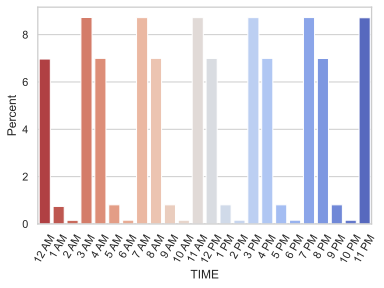

In [12]:
sns.set_theme(style="whitegrid")
ax = sns.barplot( x = 'TIME', y = 'Percent', data = Time_Counts, palette = 'coolwarm_r') 
(ax.set_xticklabels(["12 AM","1 AM", "2 AM", "3 AM","4 AM", "5 AM", "6 AM", "7 AM", 
                     "8 AM", "9 AM","10 AM","11 AM", "12 PM", "1 PM", '2 PM','3 PM',
                     '4 PM',"5 PM", "6 PM", "7 PM", "8 PM", "9 PM", "10 PM",
                     "11 PM"],rotation=60 ))
#The data time distribution.  There are 4 groups of turnstyles: 1. turnstiles that report at 0:00, 4:00, etc., 
# 2.turnstiles that report at 1:00, 5:00, etc, 3.turnstiles that report at 2:00, 6:00, etc, and 
# 4. turnstiles that report at 3:00, 7:00, etc.  
# This chart is meant to investigate whether there is enough data to get a reasonable mean from each group of turnstiles
# This chart is # of data points reported at each time period/total points
#My conclusion from this chart is that there is enough data for each mean although there may be error with some.

#plt.savefig("Presentation_Data_Distribution.png", dpi=300, bbox_inches='tight')

In [13]:
df2 = df.drop(['CA', 'UNIT', 'SCP', 'DATE', 'TIME'], axis = 1)
df2.head()

,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,DATE_TIME,UNIQUE_ID
0,59 ST,NQR456W,BMT,REGULAR,7502259,2554852,2020-12-12 03:00:00,A002 R051 02-00-00
1,59 ST,NQR456W,BMT,REGULAR,7502264,2554865,2020-12-12 07:00:00,A002 R051 02-00-00
2,59 ST,NQR456W,BMT,REGULAR,7502294,2554920,2020-12-12 11:00:00,A002 R051 02-00-00
3,59 ST,NQR456W,BMT,REGULAR,7502382,2554941,2020-12-12 15:00:00,A002 R051 02-00-00
4,59 ST,NQR456W,BMT,REGULAR,7502539,2554977,2020-12-12 19:00:00,A002 R051 02-00-00


In [14]:
df2[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df2.groupby(["UNIQUE_ID", "STATION"])[["DATE_TIME" ,"ENTRIES", 'EXITS']]
                                        .apply(lambda grp: grp.shift(1)))

In [15]:
df2.head(5)

,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,DATE_TIME,UNIQUE_ID,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,59 ST,NQR456W,BMT,REGULAR,7502259,2554852,2020-12-12 03:00:00,A002 R051 02-00-00,NaT,NaN,NaN
1,59 ST,NQR456W,BMT,REGULAR,7502264,2554865,2020-12-12 07:00:00,A002 R051 02-00-00,2020-12-12 03:00:00,7502259.0,2554852.0
2,59 ST,NQR456W,BMT,REGULAR,7502294,2554920,2020-12-12 11:00:00,A002 R051 02-00-00,2020-12-12 07:00:00,7502264.0,2554865.0
3,59 ST,NQR456W,BMT,REGULAR,7502382,2554941,2020-12-12 15:00:00,A002 R051 02-00-00,2020-12-12 11:00:00,7502294.0,2554920.0
4,59 ST,NQR456W,BMT,REGULAR,7502539,2554977,2020-12-12 19:00:00,A002 R051 02-00-00,2020-12-12 15:00:00,7502382.0,2554941.0


In [16]:
df2.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933578 entries, 0 to 2933577
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   STATION       2933578 non-null  object        
 1   LINENAME      2933578 non-null  object        
 2   DIVISION      2933578 non-null  object        
 3   DESC          2933578 non-null  object        
 4   ENTRIES       2933578 non-null  int64         
 5   EXITS         2933578 non-null  int64         
 6   DATE_TIME     2933578 non-null  datetime64[ns]
 7   UNIQUE_ID     2933578 non-null  object        
 8   PREV_DATE     2928541 non-null  datetime64[ns]
 9   PREV_ENTRIES  2928541 non-null  float64       
 10  PREV_EXITS    2928541 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 246.2+ MB


<ipython-input-16-cd63f3c55b80>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df2.info(null_counts = True)


In [17]:
df2.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
df2 = df2[df2.DESC == 'REGULAR']

In [18]:
def get_hourly_entries(df, max_ans):
    ans = abs(df["ENTRIES"] - df["PREV_ENTRIES"])
    if ans > max_ans:
        # Maybe counter was reset to 0? 
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        ans = min(df["ENTRIES"], df["PREV_ENTRIES"])
    if ans > max_ans:
        # Check it again to make sure we're not still giving a counter that's too big
        return '-999999'
    return ans

def get_hourly_exits(df, max_ans):
    ans = abs(df["EXITS"] - df["PREV_EXITS"])
    if ans > max_ans:
        # Maybe counter was reset to 0? 
        #print(row["EXITS"], row["PREV_EXITS"])
        ans = min(df["EXITS"], df["PREV_EXITS"])
    if ans > max_ans:
        # Check it again to make sure we're not still giving a counter that's too big
        return '-999999'
    return ans
def Weekday_Num(df):
    num = df.DATE_TIME.isoweekday()
    return num

In [19]:
df2["HOURLY_ENTRIES"] = df2.apply(get_hourly_entries, axis = 1, max_ans = 7200)
df2["HOURLY_EXITS"] = df2.apply(get_hourly_exits, axis=1, max_ans=7200)
df2['WEEKDAY'] = df2.apply(Weekday_Num, axis = 1)

In [20]:
index_names =df2[df2['HOURLY_EXITS']== '-999999'].index
df2.drop(index_names, inplace = True)
index_names1 = df2[df2['HOURLY_ENTRIES']== '-999999'].index
df2.drop(index_names1, inplace = True)

In [21]:
df2.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916081 entries, 1 to 2933577
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   STATION         2916081 non-null  object        
 1   LINENAME        2916081 non-null  object        
 2   DIVISION        2916081 non-null  object        
 3   DESC            2916081 non-null  object        
 4   ENTRIES         2916081 non-null  int64         
 5   EXITS           2916081 non-null  int64         
 6   DATE_TIME       2916081 non-null  datetime64[ns]
 7   UNIQUE_ID       2916081 non-null  object        
 8   PREV_DATE       2916081 non-null  datetime64[ns]
 9   PREV_ENTRIES    2916081 non-null  float64       
 10  PREV_EXITS      2916081 non-null  float64       
 11  HOURLY_ENTRIES  2916081 non-null  object        
 12  HOURLY_EXITS    2916081 non-null  object        
 13  WEEKDAY         2916081 non-null  int64         
dtypes: datetime64[ns](

In [22]:
df2.HOURLY_ENTRIES.describe()
# df2.HOURLY_EXITS.describe()

count     2916081.0
unique        961.0
top             0.0
freq       617921.0
Name: HOURLY_ENTRIES, dtype: float64

In [23]:
Station_hourly = df2.groupby(['WEEKDAY', df2.DATE_TIME.dt.hour,'STATION'])[['HOURLY_ENTRIES', 'HOURLY_EXITS','DATE_TIME', 'STATION']].head(10)
Station_hourly['WEEKDAY'], Station_hourly['HOUR'], Station_hourly['MONTH'], Station_hourly['HOURLY_ACTIVITY']  = Station_hourly.DATE_TIME.dt.weekday, Station_hourly.DATE_TIME.dt.hour,Station_hourly.DATE_TIME.dt.month, Station_hourly['HOURLY_ENTRIES'] + Station_hourly['HOURLY_EXITS']
print(Station_hourly.describe())
Station_hourly = Station_hourly.groupby(['WEEKDAY','HOUR','STATION'])[['HOURLY_ENTRIES', 'HOURLY_EXITS', 'HOURLY_ACTIVITY']].sum().sort_values('HOURLY_ACTIVITY', ascending=False).reset_index()
print(Station_hourly.value_counts())


             WEEKDAY           HOUR          MONTH
count  293235.000000  293235.000000  293235.000000
mean        2.861408      11.350275       8.680175
std         1.982763       6.902973       4.439639
min         0.000000       0.000000       1.000000
25%         1.000000       5.000000       3.000000
50%         3.000000      12.000000      12.000000
75%         4.000000      17.000000      12.000000
max         6.000000      23.000000      12.000000
WEEKDAY  HOUR  STATION          HOURLY_ENTRIES  HOURLY_EXITS  HOURLY_ACTIVITY
0        0     1 AV             305.0           395.0         700.0              1
4        7     SARATOGA AV      434.0           95.0          529.0              1
               TIMES SQ-42 ST   133.0           317.0         450.0              1
               THIRTY THIRD ST  95.0            176.0         271.0              1
               THIRTY ST        28.0            33.0          61.0               1
                                                

In [24]:
mask = ((Station_hourly['HOUR'] < 10) & (Station_hourly['HOUR'] > 6) & (Station_hourly['WEEKDAY'].isin([0,1,2,3,4]))) 
#Mask to identify Weekday morning Data
Station_hourly[mask]
print(Station_hourly.describe())

            WEEKDAY          HOUR  HOURLY_ENTRIES  HOURLY_EXITS  \
count  32765.000000  32765.000000    32765.000000  32765.000000   
mean       2.831802     11.296689      440.156539    451.898733   
std        1.978104      6.885181      478.257379    530.369872   
min        0.000000      0.000000        0.000000      0.000000   
25%        1.000000      5.000000       76.000000     96.000000   
50%        3.000000     12.000000      294.000000    280.000000   
75%        4.000000     17.000000      635.000000    620.000000   
max        6.000000     23.000000     5656.000000  11694.000000   

       HOURLY_ACTIVITY  
count     32765.000000  
mean        892.055272  
std         895.095667  
min           0.000000  
25%         219.000000  
50%         641.000000  
75%        1268.000000  
max       11911.000000  


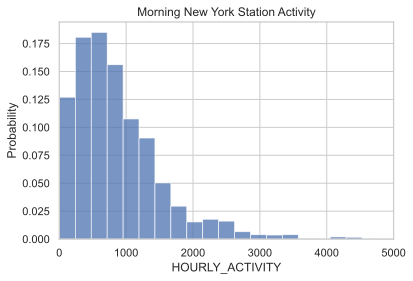

In [25]:
(sns.histplot(Station_hourly[mask]['HOURLY_ACTIVITY'],bins = 50, stat = 'probability')
.set(xlim = (0, 5000), title = 'Morning New York Station Activity'));
#Plot probability of Different Levels of activity between 6 and 10 am over the 4 hour period


In [26]:
mask = ((Station_hourly['WEEKDAY'].isin([0,1,2,3,4]))) 
Avg_Weekday_activity = (Station_hourly[mask].groupby(['WEEKDAY', 'HOUR']).mean()).reset_index()
#Create a Dataframe that averages the station 4-hourly activity for weekdays Mon-Friday

In [27]:
Avg_Weekday_activity[Avg_Weekday_activity['HOUR']==4]
#This mask will be used for further investigation of the Delta_Activity

,WEEKDAY,HOUR,HOURLY_ENTRIES,HOURLY_EXITS,HOURLY_ACTIVITY
4,0,4,14.895722,57.160428,72.056150
28,1,4,15.892761,65.302949,81.195710
52,2,4,16.168449,67.475936,83.644385
76,3,4,16.276139,66.930295,83.206434
100,4,4,16.552279,65.600536,82.152815


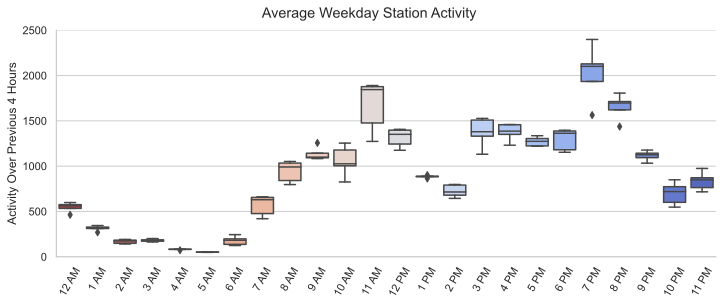

In [28]:


sns.set_theme(style="whitegrid")
ax = sns.catplot(x = 'HOUR', y='HOURLY_ACTIVITY', data = Avg_Weekday_activity, kind="box", aspect=2.5, height = 4, palette = "coolwarm_r")
(ax.set_axis_labels("", "Activity Over Previous 4 Hours")
 .set_xticklabels(["12 AM","1 AM", "2 AM", "3 AM","4 AM", "5 AM", "6 AM", "7 AM", "8 AM", "9 AM","10 AM","11 AM", "12 PM", "1 PM", '2 PM','3 PM','4 PM',"5 PM", "6 PM", "7 PM", "8 PM", "9 PM", "10 PM","11 PM"],rotation=60 )
 .set(ylim=(0, 2500)).fig.suptitle('Average Weekday Station Activity'))
ax.fig.subplots_adjust(top=0.9)
#plt.savefig("Presentation_Weekday_Activity.png", dpi=300, bbox_inches='tight')

#This plot needs to be mentally shifted to provide recommendations to account for the 4-hour window each x-value represents


In [29]:
Avg_Weekday_activity ['Delta_Activity'] = Avg_Weekday_activity.groupby(['HOUR'])['HOURLY_ACTIVITY'].diff()
Avg_Weekday_Delta= Avg_Weekday_activity.groupby('HOUR')['Delta_Activity'].mean().reset_index()
Avg_Weekday_Delta['Delta_Activity'] = Avg_Weekday_Delta['Delta_Activity'] *-1
#Avg_Weekday_Delta['Delta_Activity2']= Avg_Weekday_Delta['Delta_Activity']


In [30]:
Avg_Weekday_activity.head()

,WEEKDAY,HOUR,HOURLY_ENTRIES,HOURLY_EXITS,HOURLY_ACTIVITY,Delta_Activity
0,0,0,172.796247,290.182306,462.978552,NaN
1,0,1,103.841584,165.702970,269.544554,NaN
2,0,2,70.592593,78.037037,148.629630,NaN
3,0,3,45.422414,129.823276,175.245690,NaN
4,0,4,14.895722,57.160428,72.056150,NaN


In [31]:
Avg_Weekday_Delta.head()

,HOUR,Delta_Activity
0,0,-17.701218
1,1,-14.577792
2,2,-6.490741
3,3,0.727007
4,4,-2.524166


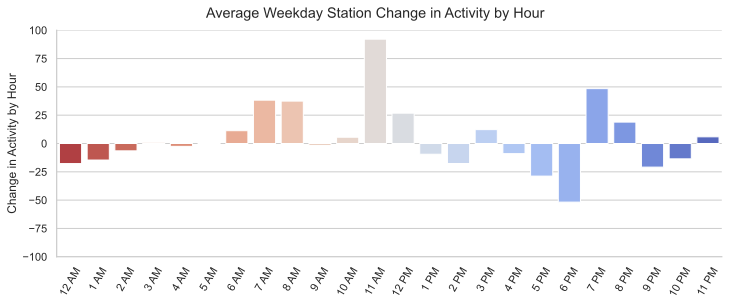

In [32]:

ax = sns.catplot(x = 'HOUR', y='Delta_Activity', data = Avg_Weekday_Delta, kind="bar", aspect=2.5, height = 4, palette = 'coolwarm_r')
(ax.set_axis_labels("", "Change in Activity by Hour")
 .set_xticklabels(["12 AM","1 AM", "2 AM", "3 AM","4 AM", "5 AM", "6 AM", "7 AM", "8 AM", 
                   "9 AM","10 AM","11 AM", "12 PM", "1 PM", '2 PM','3 PM','4 PM',"5 PM", 
                   "6 PM", "7 PM", "8 PM", "9 PM", "10 PM","11 PM"],rotation=60 )
 .set(ylim=(-100, 100)).fig.suptitle('Average Weekday Station Change in Activity by Hour'))
ax.fig.subplots_adjust(top=0.9)
#plt.savefig("Presentation_Delta_Activity.png", dpi=300, bbox_inches='tight')
#This is incomplete, but because the data has overlapping hours, I am removing the overlapping hours here so 
#that only 2 1-hour preiods are represented by each x-value.  I will convert this to an estimated 1-hr
#representation of the data with no overlap



In [33]:
Station_Daily = Station_hourly.groupby(['STATION', 'WEEKDAY']).sum().reset_index()
Station_Daily = Station_Daily.drop('HOUR', axis = 1)
Station_Daily.rename(columns= {'HOURLY_ENTRIES': 'DAILY_ENTRIES','HOURLY_EXITS': 
                            'DAILY_EXITS','HOURLY_ACTIVITY': 'DAILY_ACTIVITY'}, inplace = True)
Average_Station_Daily = Station_Daily.groupby(['STATION']).mean().reset_index()
Average_Station_Daily = Average_Station_Daily.drop('WEEKDAY', axis = 1)
Average_Station_Daily.rename(columns= {'DAILY_ENTRIES':'AVG_DAILY_ENTRIES', 'DAILY_EXITS': 'AVG_DAILY_EXITS', 
                                       'DAILY_ACTIVITY':'AVG_DAILY_ACTIVITY'}, inplace = True)
#print(Average_Station_Daily.describe())
Average_Station_Daily['Activity_Rank'] = Average_Station_Daily['AVG_DAILY_ACTIVITY'].rank()
Average_Station_Daily.sort_values(by = 'Activity_Rank', inplace = True)

Average_Station_Daily.reset_index(inplace = True)
Average_Station_Daily = Average_Station_Daily.drop('index', axis = 1)
Average_Station_Daily.head()

,STATION,AVG_DAILY_ENTRIES,AVG_DAILY_EXITS,AVG_DAILY_ACTIVITY,Activity_Rank
0,WTC-CORTLANDT,109.142857,189.142857,298.285714,1.0
1,BEACH 105 ST,115.285714,256.571429,371.857143,2.0
2,BROAD CHANNEL,307.428571,210.285714,517.714286,3.0
3,TOMPKINSVILLE,524.428571,0.000000,524.428571,4.0
4,BEACH 98 ST,259.142857,413.428571,672.571429,5.0


In [34]:
MINAVG_Station_Daily= Average_Station_Daily.head(10)
MAXAVG_Station_Daily = Average_Station_Daily.tail(10)
MINMAXAVG_Station_Daily = pd.concat([MAXAVG_Station_Daily,MINAVG_Station_Daily])
MINMAXAVG_Station_Daily.sort_values(by = 'AVG_DAILY_ACTIVITY', inplace = True, ascending = False)
MINMAXAVG_Station_Daily.reset_index(inplace=True)
MINMAXAVG_Station_Daily=MINMAXAVG_Station_Daily.drop('index', axis = 1)
MINMAXAVG_Station_Daily.head(20)
#Creating a df to plot the 10 minimum and 10 maximum Avg station daily activity on a bar chart

,STATION,AVG_DAILY_ENTRIES,AVG_DAILY_EXITS,AVG_DAILY_ACTIVITY,Activity_Rank
0,JUNCTION BLVD,18776.714286,22884.142857,41660.857143,378.0
1,125 ST,15202.714286,20597.714286,35800.428571,377.0
2,103 ST-CORONA,17231.857143,17568.142857,34800.000000,376.0
3,FLUSHING-MAIN,15695.428571,18373.428571,34068.857143,375.0
4,WOODHAVEN BLVD,16119.714286,17171.714286,33291.428571,374.0
5,JAMAICA CENTER,17402.142857,15561.142857,32963.285714,373.0
6,145 ST,12831.714286,18191.428571,31023.142857,372.0
7,34 ST-PENN STA,17751.285714,11989.714286,29741.000000,371.0
8,77 ST,12522.142857,16772.428571,29294.571429,370.0
9,82 ST-JACKSON H,11475.285714,15982.571429,27457.857143,369.0


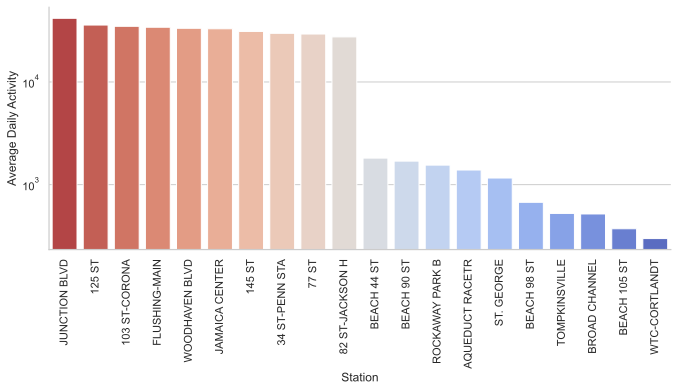

In [35]:
ax = sns.catplot( x = 'STATION', y = 'AVG_DAILY_ACTIVITY', data = MINMAXAVG_Station_Daily, palette = 'coolwarm_r', aspect=2.5, height = 4,kind = 'bar') 
ax.set_xticklabels(rotation = 90)
ax.set_axis_labels("Station", "Average Daily Activity")
ax.fig.get_axes()[0].set_yscale('log')
#plt.savefig("Presentation_Station_MINMAX.png", dpi=300, bbox_inches='tight')


In [36]:
def Rank_lookup(station):
    station = station.upper()
    rank = int(Average_Station_Daily[Average_Station_Daily['STATION']==station]['Activity_Rank'].values)
    return f"The rank of {station} out of all stations in New York is {rank} out of 378. The higher the rank, the safer the station is."

In [37]:
Stations_list = sorted(Average_Station_Daily['STATION'].values)
Stations_list

['1 AV',
 '103 ST',
 '103 ST-CORONA',
 '104 ST',
 '110 ST',
 '111 ST',
 '116 ST',
 '116 ST-COLUMBIA',
 '121 ST',
 '125 ST',
 '135 ST',
 '137 ST CITY COL',
 '138/GRAND CONC',
 '14 ST',
 '14 ST-UNION SQ',
 '145 ST',
 '149/GRAND CONC',
 '14TH STREET',
 '15 ST-PROSPECT',
 '155 ST',
 '157 ST',
 '161/YANKEE STAD',
 '163 ST-AMSTERDM',
 '167 ST',
 '168 ST',
 '169 ST',
 '170 ST',
 '174 ST',
 '174-175 STS',
 '175 ST',
 '176 ST',
 '18 AV',
 '18 ST',
 '181 ST',
 '182-183 STS',
 '183 ST',
 '190 ST',
 '191 ST',
 '2 AV',
 '20 AV',
 '207 ST',
 '21 ST',
 '21 ST-QNSBRIDGE',
 '215 ST',
 '219 ST',
 '225 ST',
 '23 ST',
 '231 ST',
 '233 ST',
 '238 ST',
 '25 AV',
 '25 ST',
 '28 ST',
 '3 AV',
 '3 AV 138 ST',
 '3 AV-149 ST',
 '30 AV',
 '33 ST',
 '33 ST-RAWSON ST',
 '34 ST-HERALD SQ',
 '34 ST-HUDSON YD',
 '34 ST-PENN STA',
 '36 AV',
 '36 ST',
 '39 AV',
 '4 AV-9 ST',
 '40 ST LOWERY ST',
 '42 ST-BRYANT PK',
 '42 ST-PORT AUTH',
 '45 ST',
 '46 ST',
 '46 ST BLISS ST',
 '47-50 STS ROCK',
 '49 ST',
 '4AV-9 ST',
 '5 AV

In [38]:
station_lookup = input("Enter a station you would like to find the Activity Rank for: ")
Rank_lookup(station_lookup)

Enter a station you would like to find the Activity Rank for: HIGH st


'The rank of HIGH ST out of all stations in New York is 204 out of 378. The higher the rank, the safer the station is.'